In [1]:
from random import *
import math
import argparse

from PIL import Image, ImageDraw, ImageOps

from tools.filters import *
from tools.strokesort import *
import tools.perlin
from tools.util import *
from tools.colorchannels import image_to_cmyk_parts

import matplotlib.pyplot as plt
import numpy as np
import cv2

import linedraw

In [47]:
def display_cmyk_grid(c, m, y, k):
    fig, axes = plt.subplots(2, 2, figsize=(8, 8))
    fig.suptitle('CMYK Channels', fontsize=14)

    images = [c, m, y, k]
    titles = ['Cyan Channel', 'Magenta Channel', 'Yellow Channel', 'Black Channel']

    for ax, img, title in zip(axes.flatten(), images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title, fontsize=12)
        ax.axis('off')

    plt.tight_layout(rect=[0, 0, 1, 1]) 
    plt.show()

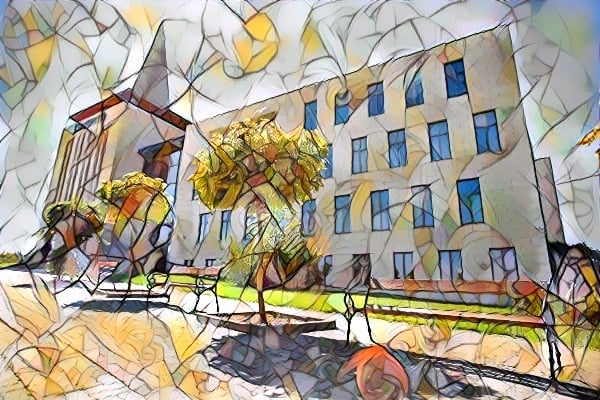

In [49]:
path = "images/sapi1.jpeg"
image = Image.open(path).convert("RGB")
w, h = image.size
image

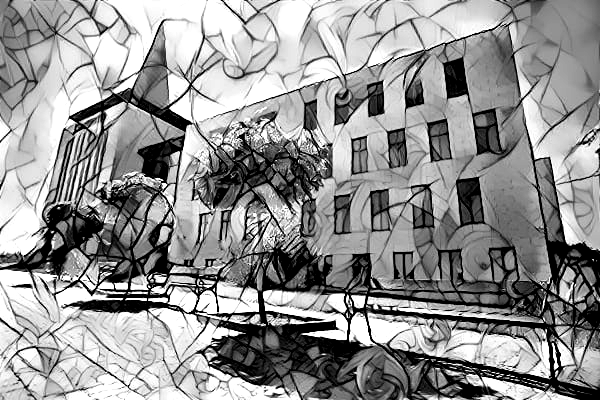

In [52]:
im_l = image.convert("L")
im_r, im_g, im_b = image.split()

im_l = ImageOps.autocontrast(im_l,10)
im_r = ImageOps.autocontrast(im_r,10)
im_g = ImageOps.autocontrast(im_g,10)
im_b = ImageOps.autocontrast(im_b,10)

im_channels = [(im_l, "black"), (im_r, "red"), (im_g, "green"), (im_b, "blue")]
im_l

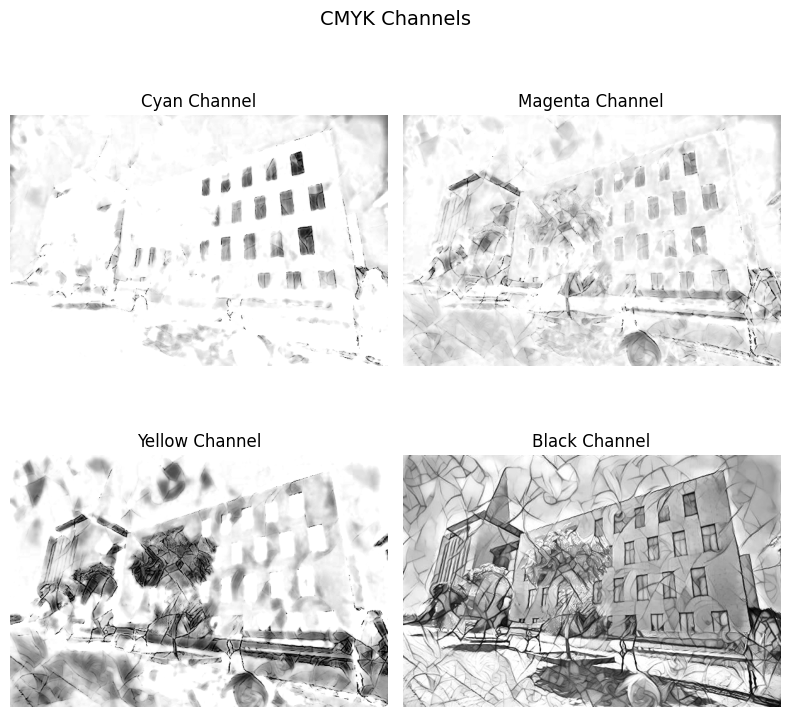

In [51]:
c,m,y,k = image_to_cmyk_parts(image)
# c, m, y, k = ImageOps.autocontrast(c, 10), ImageOps.autocontrast(m, 10), ImageOps.autocontrast(y, 10), ImageOps.autocontrast(k, 10)
display_cmyk_grid(c, m, y, k)